In [2]:

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
#read data
data=pd.read_excel("./Co2R.xlsx")

In [4]:
data

,Catalyst,Catalyst content/ %,Support,Morphology,Membrane,Electrolyte selection,Anode Compartment,Reference electrode,PH,Rate of carbon dioxide flow/ sccm,Potential (V vs RHE),CO Faradaic efficiency/ %,Current Density,Author,Year,Serial number,Unnamed: 16
0,Ag,100.0,NaN,nanowire,Nafion 117,0.1 M KHCO3,Pt,Ag/AgCl,7.2,20,-0.40,11.0,-0.2,L.Hu,2019.0,[1],NaN
1,Ag,100.0,NaN,nanowire,Nafion 117,0.1 M KHCO3,Pt,Ag/AgCl,7.2,20,-0.50,24.0,-0.3,L.Hu,NaN,NaN,NaN
2,Ag,100.0,NaN,nanowire,Nafion 117,0.1 M KHCO3,Pt,Ag/AgCl,7.2,20,-0.60,48.0,-0.4,L.Hu,NaN,NaN,NaN
3,Ag,100.0,NaN,nanowire,Nafion 117,0.1 M KHCO3,Pt,Ag/AgCl,7.2,20,-0.75,82.0,-1.4,L.Hu,NaN,NaN,NaN
4,Ag,100.0,NaN,nanowire,Nafion 117,0.1 M KHCO3,Pt,Ag/AgCl,7.2,20,-0.80,75.0,-2.0,L.Hu,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,Au,100.0,NaN,nanostructure,Nafion,0.1 M KHCO3,Pt,Ag/AgCl,6.8,20,-0.50,54.8,-4.0,D.Yang et al.,NaN,NaN,NaN
658,Au,100.0,NaN,nanostructure,Nafion,0.1 M KHCO3,Pt,Ag/AgCl,6.8,20,-0.60,59.8,-8.0,D.Yang et al.,NaN,NaN,NaN
659,Au,100.0,NaN,nanostructure,Nafion,0.1 M KHCO3,Pt,Ag/AgCl,6.8,20,-0.70,60.2,-13.0,D.Yang et al.,NaN,NaN,NaN
660,Au,100.0,NaN,nanostructure,Nafion,0.1 M KHCO3,Pt,Ag/AgCl,6.8,20,-0.80,47.8,-19.0,D.Yang et al.,NaN,NaN,NaN


In [6]:
#data selection
col_names=["Catalyst","Catalyst content/ %","Support","Morphology",'Membrane','Electrolyte selection','Anode Compartment','Reference electrode',"PH","Rate of carbon dioxide flow/ sccm",'Potential (V vs RHE)']
data=data[col_names]

In [7]:
data

,Catalyst,Catalyst content/ %,Support,Morphology,Membrane,Electrolyte selection,Anode Compartment,Reference electrode,PH,Rate of carbon dioxide flow/ sccm,Potential (V vs RHE)
0,Ag,100.0,NaN,nanowire,Nafion 117,0.1 M KHCO3,Pt,Ag/AgCl,7.2,20,-0.40
1,Ag,100.0,NaN,nanowire,Nafion 117,0.1 M KHCO3,Pt,Ag/AgCl,7.2,20,-0.50
2,Ag,100.0,NaN,nanowire,Nafion 117,0.1 M KHCO3,Pt,Ag/AgCl,7.2,20,-0.60
3,Ag,100.0,NaN,nanowire,Nafion 117,0.1 M KHCO3,Pt,Ag/AgCl,7.2,20,-0.75
4,Ag,100.0,NaN,nanowire,Nafion 117,0.1 M KHCO3,Pt,Ag/AgCl,7.2,20,-0.80
...,...,...,...,...,...,...,...,...,...,...,...
657,Au,100.0,NaN,nanostructure,Nafion,0.1 M KHCO3,Pt,Ag/AgCl,6.8,20,-0.50
658,Au,100.0,NaN,nanostructure,Nafion,0.1 M KHCO3,Pt,Ag/AgCl,6.8,20,-0.60
659,Au,100.0,NaN,nanostructure,Nafion,0.1 M KHCO3,Pt,Ag/AgCl,6.8,20,-0.70
660,Au,100.0,NaN,nanostructure,Nafion,0.1 M KHCO3,Pt,Ag/AgCl,6.8,20,-0.80


In [8]:
#print data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Catalyst                           662 non-null    object 
 1   Catalyst content/ %                662 non-null    float64
 2   Support                            300 non-null    object 
 3   Morphology                         662 non-null    object 
 4   Membrane                           662 non-null    object 
 5   Electrolyte selection              662 non-null    object 
 6   Anode Compartment                  662 non-null    object 
 7   Reference electrode                662 non-null    object 
 8   PH                                 662 non-null    float64
 9   Rate of carbon dioxide flow/ sccm  662 non-null    int64  
 10  Potential (V vs RHE)               662 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 57.0+ KB


In [9]:
#fill information
data["Support"]=data["Support"].fillna("NA")

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Catalyst                           662 non-null    object 
 1   Catalyst content/ %                662 non-null    float64
 2   Support                            662 non-null    object 
 3   Morphology                         662 non-null    object 
 4   Membrane                           662 non-null    object 
 5   Electrolyte selection              662 non-null    object 
 6   Anode Compartment                  662 non-null    object 
 7   Reference electrode                662 non-null    object 
 8   PH                                 662 non-null    float64
 9   Rate of carbon dioxide flow/ sccm  662 non-null    int64  
 10  Potential (V vs RHE)               662 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 57.0+ KB


In [12]:

cat_cols=["Catalyst","Support","Morphology",'Membrane','Electrolyte selection','Anode Compartment','Reference electrode']

conti_cols=["Catalyst content/ %","PH","Rate of carbon dioxide flow/ sccm",'Potential (V vs RHE)']

In [13]:
#onehot encode
enc = OneHotEncoder()
#fit data
enc.fit(data[cat_cols])
#transform data
data1=enc.transform(data[cat_cols])

In [14]:
#change the data dealt with onehot to df type
data1=pd.DataFrame(data1.todense(),columns=["f_"+str(i) for i in range(data1.todense().shape[1])])

In [15]:
data1

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
658,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
659,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
660,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [16]:
#Combine continuous features
data1[conti_cols]=data[conti_cols]

In [17]:
data1

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_70,f_71,f_72,f_73,f_74,f_75,Catalyst content/ %,PH,Rate of carbon dioxide flow/ sccm,Potential (V vs RHE)
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,100.0,7.2,20,-0.40
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,100.0,7.2,20,-0.50
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,100.0,7.2,20,-0.60
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,100.0,7.2,20,-0.75
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,100.0,7.2,20,-0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,100.0,6.8,20,-0.50
658,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,100.0,6.8,20,-0.60
659,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,100.0,6.8,20,-0.70
660,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,100.0,6.8,20,-0.80


In [18]:
#Standardize one hot and continuous features
X_scaler = StandardScaler()
x = X_scaler.fit_transform(data1)

In [19]:
x

array([[-0.57618743,  1.66173513, -0.34933351, ...,  0.10544095,
        -0.17951008,  1.17147499],
       [-0.57618743,  1.66173513, -0.34933351, ...,  0.10544095,
        -0.17951008,  0.92460923],
       [-0.57618743,  1.66173513, -0.34933351, ...,  0.10544095,
        -0.17951008,  0.67774347],
       ...,
       [-0.57618743, -0.60178062,  2.86259401, ..., -0.32550152,
        -0.17951008,  0.43087771],
       [-0.57618743, -0.60178062,  2.86259401, ..., -0.32550152,
        -0.17951008,  0.18401195],
       [-0.57618743, -0.60178062,  2.86259401, ..., -0.32550152,
        -0.17951008, -0.06285381]])

In [28]:
x.shape

(662, 80)

In [22]:
#PCA
pca = PCA(n_components=0.9)# Ensure that the data after dimensionality reduction maintains 90% of the information
pca.fit(x)
pca_feature=pca.transform(x)

In [23]:
#Convert the reduced data to df
features=pd.DataFrame(pca_feature,columns=["f_"+str(i) for i in range(pca_feature.shape[1])])

In [24]:
features


,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44
0,1.147958,-0.124103,1.481488,0.094030,0.232371,-0.539005,-1.015581,0.225819,0.341534,1.007058,...,6.983405e-15,-5.906870e-14,-3.471503e-15,5.360035e-13,-1.227460,-1.440750,-1.052859,-0.105479,0.931806,3.100528
1,1.120013,-0.099989,1.530096,0.091582,0.162675,-0.501829,-0.975860,0.253473,0.372941,0.975534,...,7.466032e-15,-6.001435e-14,-3.071363e-15,5.435275e-13,-1.227215,-1.438964,-1.051950,-0.109794,0.935645,3.082501
2,1.092068,-0.075874,1.578704,0.089134,0.092978,-0.464654,-0.936139,0.281127,0.404348,0.944010,...,7.948659e-15,-6.096000e-14,-2.671222e-15,5.510516e-13,-1.226969,-1.437177,-1.051041,-0.114110,0.939485,3.064475
3,1.050151,-0.039702,1.651616,0.085462,-0.011567,-0.408891,-0.876557,0.322608,0.451458,0.896723,...,8.672600e-15,-6.237847e-14,-2.071012e-15,5.623376e-13,-1.226600,-1.434498,-1.049677,-0.120583,0.945245,3.037436
4,1.036178,-0.027645,1.675920,0.084239,-0.046415,-0.390303,-0.856696,0.336435,0.467161,0.880961,...,8.913913e-15,-6.285130e-14,-1.870942e-15,5.660996e-13,-1.226478,-1.433605,-1.049223,-0.122740,0.947165,3.028423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,1.353799,-1.172577,0.257926,1.335363,1.143016,0.541026,-0.854537,-1.084262,0.691510,-1.542047,...,1.280486e-14,6.530343e-15,1.221261e-14,3.195490e-13,-1.121462,0.427261,-0.168553,0.166635,0.829203,0.037729
658,1.325854,-1.148462,0.306534,1.332915,1.073319,0.578201,-0.814816,-1.056608,0.722917,-1.573572,...,1.328749e-14,5.584692e-15,1.261275e-14,3.270730e-13,-1.121216,0.429048,-0.167645,0.162320,0.833043,0.019703
659,1.297909,-1.124348,0.355142,1.330467,1.003623,0.615377,-0.775095,-1.028954,0.754324,-1.605096,...,1.377011e-14,4.639041e-15,1.301289e-14,3.345970e-13,-1.120970,0.430834,-0.166736,0.158004,0.836883,0.001677
660,1.269964,-1.100233,0.403749,1.328020,0.933926,0.652552,-0.735373,-1.001300,0.785730,-1.636621,...,1.425274e-14,3.693390e-15,1.341303e-14,3.421211e-13,-1.120725,0.432620,-0.165827,0.153689,0.840722,-0.016349


In [27]:
features.shape

(662, 45)

In [25]:
#save data
features.to_excel("./features.xlsx",index=None)


Contribution rate of each principal component： [0.05480501 0.05098191 0.04338093 0.04117713 0.03602648 0.03374183
 0.0309277  0.02959148 0.02816337 0.02790518 0.02650658 0.02477455
 0.02359768 0.02234829 0.02141753 0.02066698 0.01874935 0.01823187
 0.01709253 0.01640534 0.01557238 0.01515508 0.01488459 0.01427522
 0.01380144 0.01334877 0.01314013 0.01295044 0.0128366  0.01272445
 0.01268989 0.01268292 0.01267738 0.01267738 0.01267738 0.01267738
 0.01267738 0.01267738 0.01267738 0.01261485 0.01252606 0.01212968
 0.01118497 0.01104136 0.01056318 0.01036438 0.00846654 0.00830713
 0.00717667 0.00680507 0.0057673  0.00555701 0.00507043 0.00462567
 0.00374925 0.00345844 0.00314537 0.00285443 0.00267397 0.00246764
 0.0021674  0.0019556  0.00174099 0.0012679  0.00116801 0.00106009
 0.00077134 0.00002396 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
Cumulative contribution rate of each principal component： [0.05480501 0.10

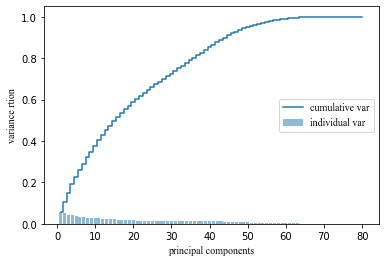

In [21]:
#Plot
import matplotlib.pyplot as plt
pca = PCA(n_components=80)
principalComponents = pca.fit_transform(x) #Train the model and get the principal component variables


var_exp=pca.explained_variance_ratio_ #Get contribution rate
np.set_printoptions(suppress=True) #When suppress=True, it means that decimals do not need to be output in the form of scientific notation
print('Contribution rate of each principal component：',var_exp)

cum_var_exp=np.cumsum(var_exp)  #Cumulative contribution
print('Cumulative contribution rate of each principal component：',cum_var_exp)

plt.bar(range(1,len(var_exp)+1),var_exp,alpha=0.5,align='center',label='individual var') # Draw a histogram,
plt.step(range(1,len(var_exp)+1),cum_var_exp,where='mid',label='cumulative var')   # Draw a ladder diagram

# Set the font of the scale value
#ax=plt.subplot(111) # 
#labels = ax.get_xticklabels() + ax.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

font = {'family': 'Times New Roman',
         'weight': 'normal'
         }

plt.ylabel('variance rtion', font)       # Y
plt.xlabel('principal components', font) # X
# para1=[1,2,3,4,5,6,7,8,9]
# plt.xticks(para1,para1)
plt.legend(loc='right', prop = font)  # Legend position, lower right corner
plt.show()
